# Метод главных компонент 

(Principal component analisys – PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
N = 200
X, y = make_blobs(n_samples = N, cluster_std = [1.5, .7, 1], 
                  centers = [[-.3, 0], [2, 2], [3.25, 5]], 
                  shuffle = True, random_state = 42)

In [57]:
X.shape

(200, 2)

In [3]:
X_mean = np.mean(X, axis = 0)

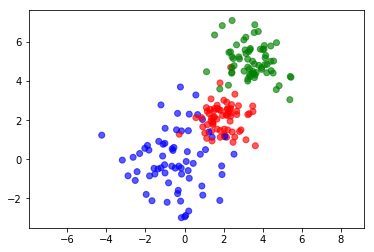

In [4]:
colors = ['b' if yy == 0 else 'r' if yy == 1 else 'g' for yy in y]
plt.scatter(X[:, 0], X[:, 1], color = colors, alpha = 0.65)
plt.axis('equal')
pass

In [5]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_model.fit(X)
print("Главные компоненты (по строкам):")
print(pca_model.components_)
print("Дисперсии по главным компонентам:")
print(pca_model.explained_variance_)

Главные компоненты (по строкам):
[[-0.60671554 -0.79491903]
 [-0.79491903  0.60671554]]
Дисперсии по главным компонентам:
[ 7.92219427  1.17832201]


In [6]:
print("Среднеквадратические отклонения:")
print(np.sqrt(pca_model.explained_variance_))

Среднеквадратические отклонения:
[ 2.81463928  1.08550542]


In [7]:
np.dot(pca_model.components_, pca_model.components_.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

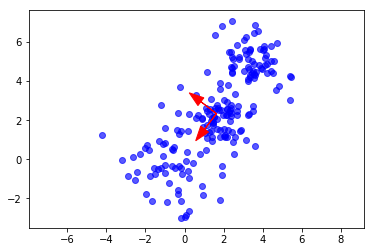

In [8]:
plt.scatter(X[:, 0], X[:, 1], color = 'b', alpha = 0.65)
v0 = pca_model.components_[0]
v1 = pca_model.components_[1]
#v0 = np.sqrt(pca_model.explained_variance_[0])*pca_model.components_[0]
#v1 = np.sqrt(pca_model.explained_variance_[1])*pca_model.components_[1]
plt.arrow(X_mean[0], X_mean[1], v0[0], v0[1], color = 'r', width = .005, head_width = .5)
plt.arrow(X_mean[0], X_mean[1], v1[0], v1[1], color = 'r', width = .005, head_width = .5)
plt.axis('equal');

### Как самим найти главные компоненты?

#### 1. Через собственные векторы матрицы ковариации

Вначале оценим матрицу ковариации:

In [42]:
C = np.cov(X, rowvar = 0) 
print(C)

[[ 3.67916243  3.26884451]
 [ 3.26884451  5.46708508]]


Или вручную:

In [47]:
X_c = X - X_mean
print(np.dot(X_c.T, X_c)/(N - 1))

[[ 3.67916243  3.26884451]
 [ 3.26884451  5.46708508]]


Главные компоненты – это собственные векторы матрицы ковариации, а дисперсии по главным компонентам – собственные числа. Собственные векторы записаны по столбцам:

In [52]:
D, Q = np.linalg.eig(C)
print(D*(N-1)/(N))
print(Q)

[ 1.17832201  7.92219427]
[[-0.79491903 -0.60671554]
 [ 0.60671554 -0.79491903]]


$$
D = Q^{-1} C Q
\quad
\Leftrightarrow
\quad
C = QDQ^{-1}
$$

$D$ – диагональная матрица, составленная из собственных чисел на диагонали (дисперсий по главным компонентам)

$Q$ – матрица, составленная из собственных векторов (главных компонент), $Q^{-1} = Q^{\rm T}$

In [49]:
# Проверка:
np.dot(Q.T, Q)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [50]:
# Проверка:
np.dot(np.dot(Q.T, C), Q)

array([[  1.18424322e+00,  -1.11022302e-16],
       [ -4.44089210e-16,   7.96200429e+00]])

#### 2. Через сингулярное разложение

Профессиональный способ.
Не требует нахождения матрицы $C$ и выполнения умножения $X^{\rm T} X$.

_Сингулярное разложение_ матрицы $X$ – это

$$
\underbrace{X}_{N\times d} = \underbrace{U}_{N\times N} \cdot
\underbrace{\Sigma}_{N\times d} \cdot
\underbrace{V^{\rm T}}_{d\times d}
$$

Матрицы $U$ и $V$ – ортогональные ($U^{-1} = U^{\rm T}$, $V^{-1} = V^{\rm T}$)

Матрица $\Sigma$ – диагональная с неотрицательными диагональными элементами (_сингулярными числами_), записанными в порядке убывания

В матрице $U$ по столбцам – _левые сингулярные векторы_

В матрице $V$ по столбцам – _правые сингулярные векторы_ (это и есть главные компоненты!)

Пусть $d < N$, тогда лучше использовать _неполное сингулярное разложение_:
$$
\underbrace{X}_{N\times d} = \underbrace{U}_{N\times d} \cdot
\underbrace{\Sigma}_{d\times d} \cdot
\underbrace{V^{\rm T}}_{d\times d}
$$


Если $d > N$, то наоборот:
$$
\underbrace{X}_{N\times d} = \underbrace{U}_{N\times N} \cdot
\underbrace{\Sigma}_{N\times N} \cdot
\underbrace{V^{\rm T}}_{N\times d}
$$

In [53]:
U, Sigma, Vt = np.linalg.svd(X_c, full_matrices = False)
V = Vt.T

In [54]:
#print U
print(Sigma)
print(Vt)

[ 39.80501041  15.35136481]
[[-0.60671554 -0.79491903]
 [-0.79491903  0.60671554]]


Пусть данные в $X$ центрированы, тогда
$$
C = \frac{1}{N} X^{\rm T} X = \frac{1}{N} (U \Sigma V^{\rm T})^{\rm T} (U \Sigma V^{\rm T}) = 
\frac{1}{N} V\Sigma^2 V^{\rm T} = V \left(\frac{1}{N-1} \Sigma^2\right) V^{\rm T}
$$

Итак, $V$ составлена из главных компонент (правых сингулярных векторов). 

С точностью до перестановки столбцов $V=Q$.

$\frac{1}{N} \Sigma^2$ составлена из дисперсий по главным компонентам.

С точностью до перестановки диагональных элементов $\frac{1}{N} \Sigma^2 = D$.

In [58]:
print(Sigma**2/N)

[ 7.92219427  1.17832201]


## Понижение размерности

In [18]:
pca_model = PCA(n_components = 1)
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(200, 2)
(200, 1)


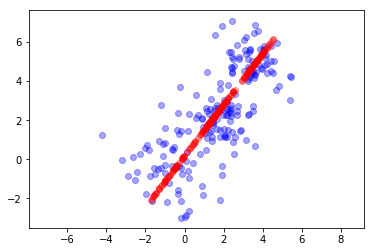

In [19]:
X_new = pca_model.inverse_transform(X_proj)
plt.scatter(X[:, 0],     X[:, 1],     alpha = 0.35, color = 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.35, color = 'r')
plt.axis('equal');

### Какое количество главных компонент выбрать?

Пусть $\sigma_1^2 \ge \sigma_2^2 \ge \dots \ge \sigma_s^2 \ge \dots \ge \sigma_d^2 \ge 0$ – дисперсии по главным компонентам (собственные числа матрицы ковариации $C$).

Один из способов выбора необходимого числа $s$ главных компонент:

Объясненная дисперсия не меньше некоторого заданного уровня $\alpha$ (например, $\alpha = 0.85$):

$$
\frac{\sigma_1^2 + \sigma_2^2 + \dots + \sigma_s^2}{\sigma_1^2 + \sigma_2^2 + \dots + \sigma_s^2 + \dots +\sigma^2_d} \ge \alpha
$$

Заметим, что $\sigma_1^2 + \sigma_2^2 + \dots + \sigma_s^2 + \dots +\sigma^2_d = {\rm tr \,C}$

In [20]:
pca_model = PCA(n_components = 0.85) # сохраняем 85% дисперсии
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(200, 2)
(200, 1)


In [21]:
X_c.dot(Vt.T) == X_proj

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ Tr

In [22]:
U.dot(np.diag(Sigma))

array([[  3.42574315e+00,  -2.82986110e+00],
       [  2.84635568e+00,   6.22385233e-01],
       [  1.96621468e+00,  -1.83449316e+00],
       [ -2.63580035e+00,  -4.28225892e-01],
       [  6.47825116e-01,  -1.14449211e+00],
       [  1.80577288e+00,  -6.73730271e-01],
       [  6.56844788e-01,  -1.01410507e+00],
       [  2.35308308e-01,   2.04305677e-03],
       [ -1.47701646e-01,   2.33981112e-01],
       [ -2.42860331e-01,   1.46962902e-03],
       [  6.74242117e-01,   3.84027451e-01],
       [  4.72358565e-01,  -5.79093117e-03],
       [ -7.68763344e-01,   1.13787651e-01],
       [ -2.86942190e+00,   1.39078836e+00],
       [  3.68831114e+00,   5.20981760e-01],
       [ -2.83997636e+00,  -2.54974771e+00],
       [ -5.32223520e-01,  -2.98952025e-01],
       [ -2.83364050e+00,   4.09403465e-02],
       [  8.77297635e-01,  -3.47805709e-01],
       [ -7.78385389e-01,  -6.77186169e-02],
       [  2.18957687e+00,   1.62990246e+00],
       [  3.54049520e+00,  -4.58433941e-01],
       [  

In [23]:
X_proj

array([[ 3.42574315],
       [ 2.84635568],
       [ 1.96621468],
       [-2.63580035],
       [ 0.64782512],
       [ 1.80577288],
       [ 0.65684479],
       [ 0.23530831],
       [-0.14770165],
       [-0.24286033],
       [ 0.67424212],
       [ 0.47235857],
       [-0.76876334],
       [-2.8694219 ],
       [ 3.68831114],
       [-2.83997636],
       [-0.53222352],
       [-2.8336405 ],
       [ 0.87729764],
       [-0.77838539],
       [ 2.18957687],
       [ 3.5404952 ],
       [ 5.31727717],
       [-4.24505081],
       [-2.28911651],
       [-2.57941678],
       [-3.17816805],
       [-0.25359543],
       [ 3.57790047],
       [-2.90000016],
       [-0.57396255],
       [-3.13441718],
       [ 0.38879216],
       [ 4.00486523],
       [ 3.39401815],
       [ 2.80495584],
       [-4.4295352 ],
       [ 0.20513897],
       [-2.317     ],
       [-2.34126591],
       [-2.93452995],
       [-2.84322985],
       [ 5.54122078],
       [-3.2687893 ],
       [ 1.19780849],
       [-3

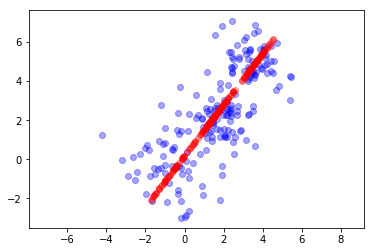

In [24]:
X_new = pca_model.inverse_transform(X_proj)
plt.scatter(X[:, 0],     X[:, 1],     alpha = 0.35, color = 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.35, color = 'r')
plt.axis('equal');

In [25]:
pca_model.explained_variance_ratio_

array([ 0.87052141])

In [26]:
pca_model.explained_variance_[0]/(np.sum(pca_model.explained_variance_))

1.0

In [27]:
pca_model.explained_variance_[0]/(np.sum(np.diag(C)))

0.8661688038105877

### Whitening – «отбеливание»

Нормировка на единичные выборочные дисперсии

In [59]:
pca_model = PCA(n_components = 2, whiten = True)
pca_model.fit(X)
print("Главные компоненты (по строкам):")
print(pca_model.components_)
print("Дисперсии по главным компонентам:")
print(pca_model.explained_variance_)

Главные компоненты (по строкам):
[[-0.60671554 -0.79491903]
 [-0.79491903  0.60671554]]
Дисперсии по главным компонентам:
[ 7.92219427  1.17832201]


In [60]:
np.dot(pca_model.components_, pca_model.components_.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [61]:
X_proj = pca_model.transform(X)
X_new = X_proj.dot(Vt.T) + X_mean

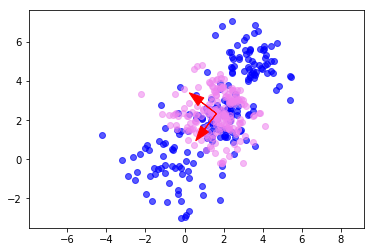

In [62]:
plt.scatter(X[:, 0], X[:, 1], color = 'b', alpha = 0.65)
plt.scatter(X_new[:, 0], X_new[:, 1], color = 'violet', alpha = 0.55)
v0 = pca_model.components_[0]
v1 = pca_model.components_[1]
plt.arrow(X_mean[0], X_mean[1], v0[0], v0[1], color = 'r', width = .005, head_width = .5)
plt.arrow(X_mean[0], X_mean[1], v1[0], v1[1], color = 'r', width = .005, head_width = .5)
plt.axis('equal');

In [63]:
pca_model.explained_variance_

array([ 7.92219427,  1.17832201])

In [64]:
X_proj

array([[  1.21711623e+00,  -2.60695254e+00],
       [  1.01126837e+00,   5.73359860e-01],
       [  6.98567200e-01,  -1.68998987e+00],
       [ -9.36461155e-01,  -3.94494477e-01],
       [  2.30162750e-01,  -1.05434030e+00],
       [  6.41564586e-01,  -6.20660442e-01],
       [  2.33367307e-01,  -9.34223866e-01],
       [  8.36015861e-02,   1.88212490e-03],
       [ -5.24762259e-02,   2.15550387e-01],
       [ -8.62847091e-02,   1.35386613e-03],
       [  2.39548322e-01,   3.53777554e-01],
       [  1.67822061e-01,  -5.33477870e-03],
       [ -2.73130326e-01,   1.04824582e-01],
       [ -1.01946346e+00,   1.28123576e+00],
       [  1.31040278e+00,   4.79943953e-01],
       [ -1.00900189e+00,  -2.34890372e+00],
       [ -1.89091201e-01,  -2.75403531e-01],
       [ -1.00675086e+00,   3.77154696e-02],
       [  3.11690966e-01,  -3.20409004e-01],
       [ -2.76548897e-01,  -6.23844118e-02],
       [  7.77924507e-01,   1.50151481e+00],
       [  1.25788595e+00,  -4.22323034e-01],
       [  

In [65]:
np.sqrt(Sigma)

array([ 6.30912121,  3.91808178])

In [66]:
X_c.dot(V)/np.sqrt(pca_model.explained_variance_)

array([[  1.21711623e+00,  -2.60695254e+00],
       [  1.01126837e+00,   5.73359860e-01],
       [  6.98567200e-01,  -1.68998987e+00],
       [ -9.36461155e-01,  -3.94494477e-01],
       [  2.30162750e-01,  -1.05434030e+00],
       [  6.41564586e-01,  -6.20660442e-01],
       [  2.33367307e-01,  -9.34223866e-01],
       [  8.36015861e-02,   1.88212490e-03],
       [ -5.24762259e-02,   2.15550387e-01],
       [ -8.62847091e-02,   1.35386613e-03],
       [  2.39548322e-01,   3.53777554e-01],
       [  1.67822061e-01,  -5.33477870e-03],
       [ -2.73130326e-01,   1.04824582e-01],
       [ -1.01946346e+00,   1.28123576e+00],
       [  1.31040278e+00,   4.79943953e-01],
       [ -1.00900189e+00,  -2.34890372e+00],
       [ -1.89091201e-01,  -2.75403531e-01],
       [ -1.00675086e+00,   3.77154696e-02],
       [  3.11690966e-01,  -3.20409004e-01],
       [ -2.76548897e-01,  -6.23844118e-02],
       [  7.77924507e-01,   1.50151481e+00],
       [  1.25788595e+00,  -4.22323034e-01],
       [  

In [73]:
X_c.dot(V)/Sigma*np.sqrt(N)

array([[  1.21711623e+00,  -2.60695254e+00],
       [  1.01126837e+00,   5.73359860e-01],
       [  6.98567200e-01,  -1.68998987e+00],
       [ -9.36461155e-01,  -3.94494477e-01],
       [  2.30162750e-01,  -1.05434030e+00],
       [  6.41564586e-01,  -6.20660442e-01],
       [  2.33367307e-01,  -9.34223866e-01],
       [  8.36015861e-02,   1.88212490e-03],
       [ -5.24762259e-02,   2.15550387e-01],
       [ -8.62847091e-02,   1.35386613e-03],
       [  2.39548322e-01,   3.53777554e-01],
       [  1.67822061e-01,  -5.33477870e-03],
       [ -2.73130326e-01,   1.04824582e-01],
       [ -1.01946346e+00,   1.28123576e+00],
       [  1.31040278e+00,   4.79943953e-01],
       [ -1.00900189e+00,  -2.34890372e+00],
       [ -1.89091201e-01,  -2.75403531e-01],
       [ -1.00675086e+00,   3.77154696e-02],
       [  3.11690966e-01,  -3.20409004e-01],
       [ -2.76548897e-01,  -6.23844118e-02],
       [  7.77924507e-01,   1.50151481e+00],
       [  1.25788595e+00,  -4.22323034e-01],
       [  

In [67]:
U * Sigma /np.sqrt(pca_model.explained_variance_)

array([[  1.21711623e+00,  -2.60695254e+00],
       [  1.01126837e+00,   5.73359860e-01],
       [  6.98567200e-01,  -1.68998987e+00],
       [ -9.36461155e-01,  -3.94494477e-01],
       [  2.30162750e-01,  -1.05434030e+00],
       [  6.41564586e-01,  -6.20660442e-01],
       [  2.33367307e-01,  -9.34223866e-01],
       [  8.36015861e-02,   1.88212490e-03],
       [ -5.24762259e-02,   2.15550387e-01],
       [ -8.62847091e-02,   1.35386613e-03],
       [  2.39548322e-01,   3.53777554e-01],
       [  1.67822061e-01,  -5.33477870e-03],
       [ -2.73130326e-01,   1.04824582e-01],
       [ -1.01946346e+00,   1.28123576e+00],
       [  1.31040278e+00,   4.79943953e-01],
       [ -1.00900189e+00,  -2.34890372e+00],
       [ -1.89091201e-01,  -2.75403531e-01],
       [ -1.00675086e+00,   3.77154696e-02],
       [  3.11690966e-01,  -3.20409004e-01],
       [ -2.76548897e-01,  -6.23844118e-02],
       [  7.77924507e-01,   1.50151481e+00],
       [  1.25788595e+00,  -4.22323034e-01],
       [  

In [71]:
U * np.sqrt(N)

array([[  1.21711623e+00,  -2.60695254e+00],
       [  1.01126837e+00,   5.73359860e-01],
       [  6.98567200e-01,  -1.68998987e+00],
       [ -9.36461155e-01,  -3.94494477e-01],
       [  2.30162750e-01,  -1.05434030e+00],
       [  6.41564586e-01,  -6.20660442e-01],
       [  2.33367307e-01,  -9.34223866e-01],
       [  8.36015861e-02,   1.88212490e-03],
       [ -5.24762259e-02,   2.15550387e-01],
       [ -8.62847091e-02,   1.35386613e-03],
       [  2.39548322e-01,   3.53777554e-01],
       [  1.67822061e-01,  -5.33477870e-03],
       [ -2.73130326e-01,   1.04824582e-01],
       [ -1.01946346e+00,   1.28123576e+00],
       [  1.31040278e+00,   4.79943953e-01],
       [ -1.00900189e+00,  -2.34890372e+00],
       [ -1.89091201e-01,  -2.75403531e-01],
       [ -1.00675086e+00,   3.77154696e-02],
       [  3.11690966e-01,  -3.20409004e-01],
       [ -2.76548897e-01,  -6.23844118e-02],
       [  7.77924507e-01,   1.50151481e+00],
       [  1.25788595e+00,  -4.22323034e-01],
       [  

In [70]:
pca_model.explained_variance_

array([ 7.92219427,  1.17832201])

In [69]:
Sigma**2/N

array([ 7.92219427,  1.17832201])